In [ ]:
%reset -f
%reload_ext autoreload
%autoreload 2

import os
import sys
import importlib
import numpy as np
import pandas as pd

# === Setup ===
# Might need to change to main directory of MolFeatures
ROOT_DIR =   os.path.dirname(os.getcwd()) + '\\MolFeatures'
print(ROOT_DIR)
sys.path.append(ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR, 'M3_modeler'))
sys.path.append(os.path.join(ROOT_DIR, 'M2_data_extractor'))
sys.path.append(os.path.join(ROOT_DIR, 'utils'))

os.chdir(ROOT_DIR)  # Set working directory

# === Clear old module caches ===
for module in ['data_extractor', 'feather_extractor', 'gaussian_handler', 'help_functions', 'modeling', 'plot']:
    sys.modules.pop(module, None)

# === Safe Imports ===
try:

    from help_functions import dict_to_horizontal_df, get_df_from_file, pick_samples_to_remove_for_distribution, add_output_column_csv
    from modeling import (
        ClassificationModel,
        LinearRegressionModel,
        fit_and_evaluate_single_combination_regression,
        fit_and_evaluate_single_combination_classification
        
    )
    import plot
except ModuleNotFoundError as e:
    print(f"Module import failed: {e} \nPlease ensure all required modules are installed and available in the path specified on the right hand corner of the notebook.")

# === Config ===
pd.set_option('display.max_columns', None)



c:\Users\edens\Documents\GitHub\LabCode\MolFeatures


In the next part, an example file from directory modeling_example is used, but you can pick any csv, just specify the correct path.

**Note that you need to have an output column values in order to create a model, either add manually, or in target_csv_filepath enter the location of the output csv**

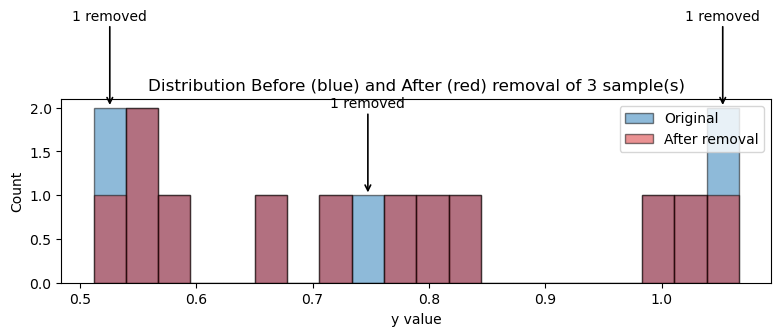

In [2]:

modeling_example_dir = os.path.join(ROOT_DIR,'modeling_example')
csv_path=os.path.join(modeling_example_dir, 'Linear_Dataset_Example.csv')
csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
features_df=pd.read_csv(csv_path, index_col=0)
y=features_df['output']
samples_to_remove = pick_samples_to_remove_for_distribution(y, n_remove=3)


Database already exists at: results_Linear_Dataset_Example.db
Table 'regression_results' has been ensured to exist.
linear model selected

--- Correlation Report ---
Features with correlation above 0.8:
['-1-2-', '-2-9-']



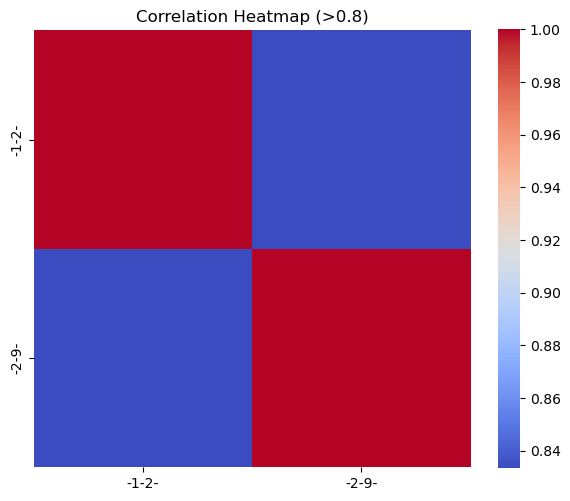


Correlated features were not dropped.



ValueError: Molecule name 'basic' not found in molecule_names.

In [6]:
regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', output_name='output',
                                        leave_out=samples_to_remove, min_features_num=2,
                                        max_features_num=4, metrics=None, return_coefficients=False)
# indices in leave_out will drop the corresponding samples from the training set and will be used in the test set.

regression_model.search_models(top_n=5,initial_r2_threshold=0.9)

example use on a selected combination.

In [20]:
features=['Dist(1, 2)', 'Dist(2, 9)', 'Dist(16, 17)', 'dip_x']
plot.generate_and_display_single_combination_plot(regression_model, features)

Extracting features from model.features_df...
Using Leave-One-Out cross-validation (LOO)...
R2:0.816 Q2: 0.582, MAE: 0.103, RMSD: 0.123 for combination: ['Dist(1, 2)', 'Dist(2, 9)', 'Dist(16, 17)', 'dip_x']
Error during model fitting/prediction: 'predictions'


Database already exists at: results_Logistic_Dataset_Example.db
Table 'classification_results' has been ensured to exist.

No features exceeded the correlation threshold.

Left out samples:   ['m_bromo', 'o_methyl']
Remaining samples:  ['o_fluoro', 'm_chloro', 'm_cyano', 'm_fluoro', 'm_iodo', 'm_methyl_formyl', 'm_trifluoromethyl', 'p_bromo', 'p_chloro', 'p_cyano', 'p_fluoro', 'p_iodo', 'p_methyl_formyl', 'p_trifluoromethyl', 'mm_dibromo', 'mm_dichloro', 'epiandrosterone', 'quinoline', 'benzo_thiophene', 'diacetone_glucose', 'thiophene', 'o_bromo', 'o_chloro', 'o_ethynyl', 'o_hydroxy', 'o_methoxy', 'o_trifluoro', 'o_trifluoromethoxy', 'm_methyl', 'm_methoxy', 'm_oBoc', 'p_diethoxymethyl', 'p_isopropyl', 'p_methoxy', 'p_methyl', 'pregnenolone', 'dibenzo_furan', 'menthol', 'ibuprofen', 'benzo_dioxole', 'naproxene', 'naphthaldehyde', 'o_phenyl', 'o_nbutoxy', 'o_iodo', 'o_secbutoxy', 'p_hydroxy', 'indole', 'phenanthrene', 'ethyl_carbazole', 'phenylsulfonyl_pyrrole', 'pyrrole', 'methyl_indo

evaluation: 0it [00:00, ?it/s]


| formula                    |   accuracy |   precision |   recall |       f1 |   mcfaden |   avg_accuracy |     avg_f1 |   Model_id |
|:---------------------------|-----------:|------------:|---------:|---------:|----------:|---------------:|-----------:|-----------:|
| ('flag', '-2-7-')          |   0.961538 |    0.963141 | 0.961538 | 0.961697 |  0.621834 |       0.925455 |   0.926073 |          2 |
| ('flag', '-2-3-')          |   0.923077 |    0.927885 | 0.923077 | 0.923681 |  0.645333 |       0.903636 |   0.90389  |          0 |
| ('flag', '-2-3-', '-2-7-') |   0.942308 |    0.94398  | 0.942308 | 0.942689 |  0.630286 |       0.867273 |   0.861808 |          1 |
| ('-2-3-', '-2-7-')         |   0.653846 |    0.65432  | 0.653846 | 0.649817 |  0.296204 |     nan        | nan        |          3 |
Checking correlation matrix:
            flag     -2-7-
flag   1.000000  0.106529
-2-7-  0.106529  1.000000
Checking VIF values:
   variables       VIF
0      flag  1.011479
1     -2-7-  1.0

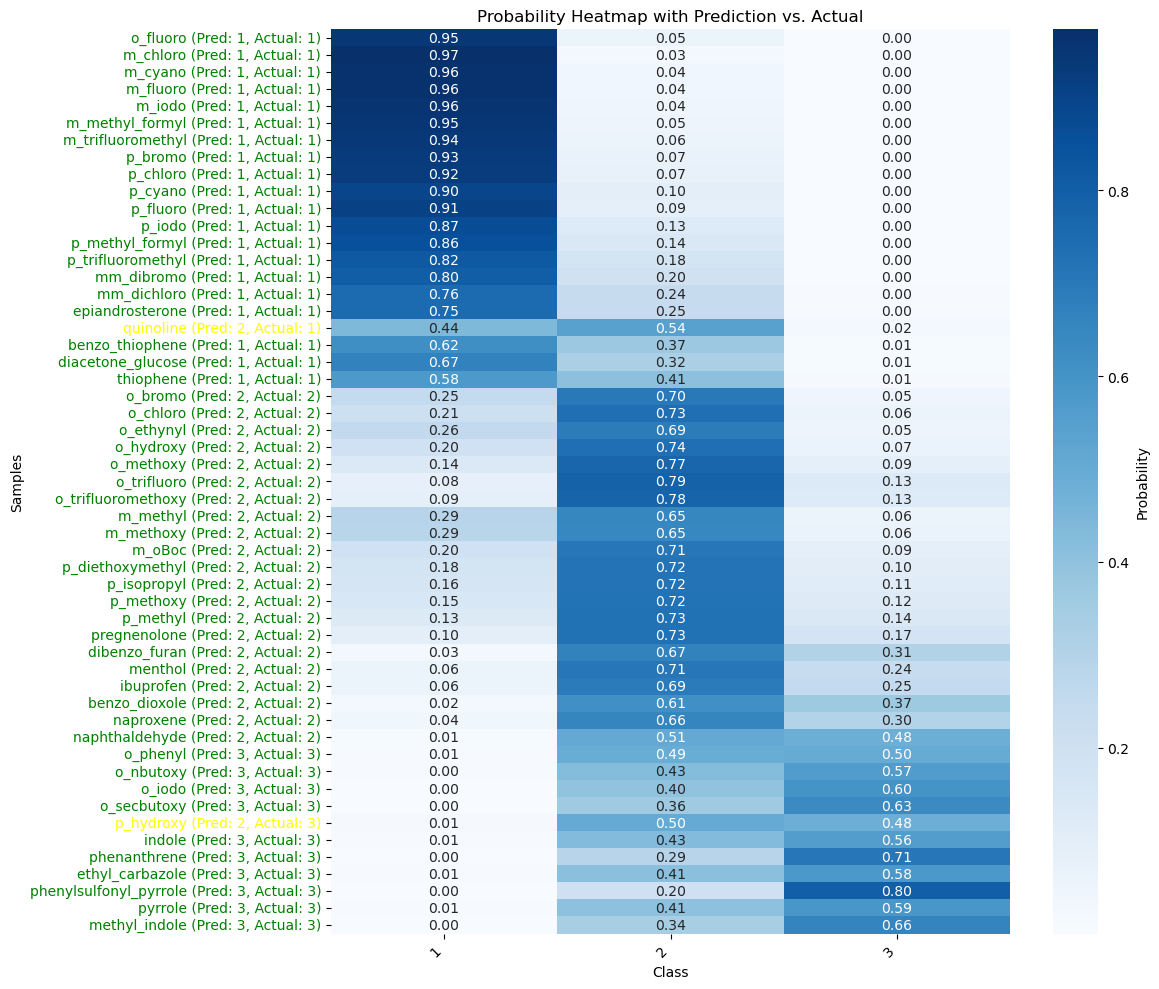





VIF Table

---

| variables   |     VIF |
|:------------|--------:|
| flag        | 1.01148 |
| -2-7-       | 1.01148 |

Confusion Matrix

Results saved to classification_results.txt in c:\Users\edens\Documents\GitHub\LabCode\MolFeatures


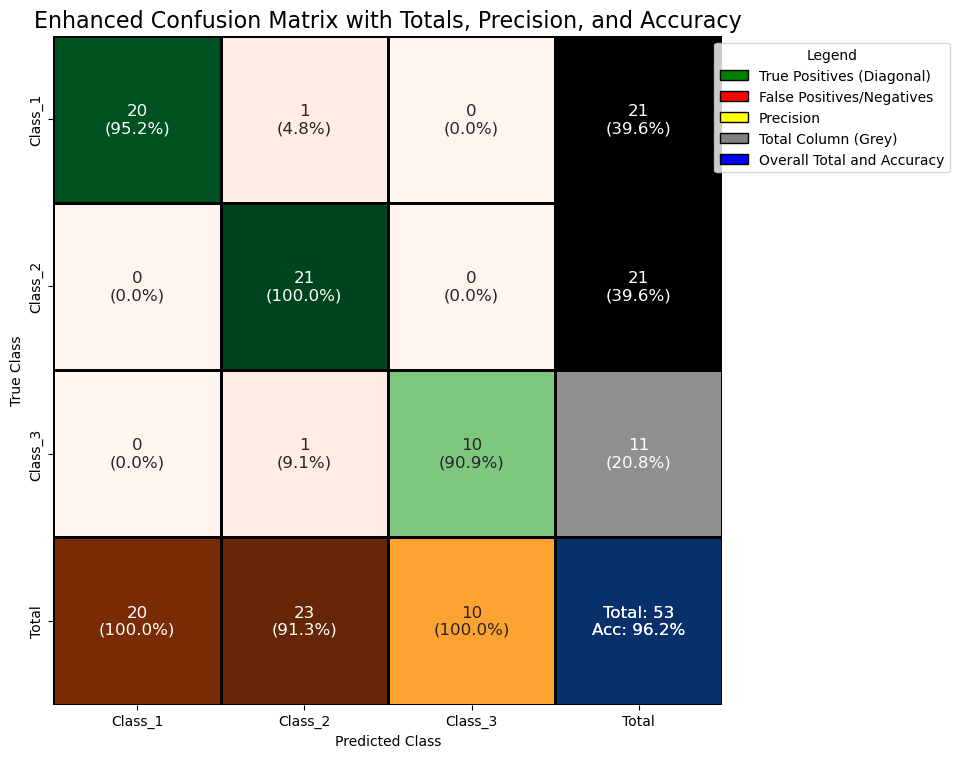

Exiting model selection.
| sample_name   |   true |   predicted |
|:--------------|-------:|------------:|
| m_bromo       |      1 |           1 |
| o_methyl      |      2 |           2 |


,id,combination,accuracy,precision,recall,f1_score,mcfadden_r2,avg_accuracy,avg_f1_score,threshold
0,1,"('flag', '-2-3-')",0.923077,0.927885,0.923077,0.923681,0.645333,0.903636,0.903890,0.5
3,4,"('flag', '-2-3-', '-2-7-')",0.942308,0.943980,0.942308,0.942689,0.630286,0.867273,0.861808,0.5
1,2,"('flag', '-2-7-')",0.961538,0.963141,0.961538,0.961697,0.621834,0.925455,0.926073,0.5
2,3,"('-2-3-', '-2-7-')",0.653846,0.654320,0.653846,0.649817,0.296204,NaN,NaN,0.5


In [12]:

modeling_example_dir = os.path.join(ROOT_DIR,'modeling_example')
csv_path=os.path.join(modeling_example_dir, 'Logistic_Dataset_Example.csv')
csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
classification_model= ClassificationModel(csv_filepaths, process_method='one csv', output_name='class',
                                        leave_out=[1,27], min_features_num=2,
                                        max_features_num=4, metrics=None, return_coefficients=False)
classification_model.search_models(top_n=5,mcfadden_threshold=0.5)